# Starting cluster

## Prerequisites
First, you need to install MPI, on windows use MS-MPI:
https://msdn.microsoft.com/en-us/library/bb524831(v=vs.85).aspx


## With a profile (not working)
In theory, you should be able to create a profile using
```
ipython profile create --parallel --profile=myprofile
```
and then set
```
c.IPClusterEngines.engine_launcher_class = 'MPIEngineSetLauncher'
```
in ```<IPYTHON-DIR>/profile_myprofile/ipcluster_config.py```. This should then enable you to start a cluster using
```
ipcluster start --profile=myprofile
```
or alternatively through the Clusters tab in Jupyter


## Without a profile (not working)
An alternative is to run
```
ipcluster start --engines=MPI
```


## Manual start (working)
This, however, does *not* work for me on Windows. What does work is the following:

Start a controller using
```
ipcontroller --ip='*'
```
and then start several engines using mpiexec:
```
mpiexec -n 4 ipengine --mpi
```

In [1]:
from GPUSimulators import IPythonMagic

In [2]:
%setup_logging --out mpi.log

Console logger using level INFO
File logger using level DEBUG to mpi.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]


In [3]:
%setup_mpi --num_engines 4

Starting IPController
Starting IPEngines
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Waiting for cluster...
Done


In [4]:
import ipyparallel

# attach to a running cluster
cluster = ipyparallel.Client()#profile='mpi')

print('profile:', cluster.profile)
print('Number of ids:', len(cluster.ids))
print("IDs:", cluster.ids) # Print process id numbers

profile: default
Number of ids: 4
IDs: [0, 1, 2, 3]


In [5]:
%%px

from mpi4py import MPI
comm = MPI.COMM_WORLD
print("MPI rank {:d} of {:d} OK".format(comm.rank, comm.size))
comm.Barrier()   

[stdout:0] MPI rank 0 of 4 OK
[stdout:1] MPI rank 1 of 4 OK
[stdout:2] MPI rank 2 of 4 OK
[stdout:3] MPI rank 3 of 4 OK


In [6]:
%%px

from mpi4py import MPI
import numpy

comm = MPI.COMM_WORLD
rank = comm.Get_rank()

print("Starting")
# passing MPI datatypes explicitly
if rank == 0:
    data = numpy.arange(100, dtype='i')
    numpy.random.shuffle(data)
    comm.Send([data, MPI.INT], dest=1, tag=77)
    print("{0}: sent data to 1: {1}".format(rank, data))
elif rank == 1:
    data = numpy.empty(100, dtype='i')
    comm.Recv([data, MPI.INT], source=0, tag=77)
    print("{0}: received data from 0: {1}".format(rank, data))
else:
    print("{0}: idle".format(rank))
    
print()

[stdout:0] 
Starting
0: sent data to 1: [91 81 57 75 60 73  2 68 11 50 71 17 65 20  4 64 48 34 66 37  5 85 42 80
 25 78 83 94 38 72 27 93 82 56 92 51 88 22 29 79 14 13 47 35  0 30 63  3
 12 99 24 23 15 32 44  1 62 67 19  8 87 45 16 61 84  7 49 10 21 69 89 70
 39 86 98 90 36  9 53 54 33 43 26 58 77 40 95  6 41 74 46 28 59 76 31 97
 55 18 96 52]

[stdout:1] 
Starting
1: received data from 0: [91 81 57 75 60 73  2 68 11 50 71 17 65 20  4 64 48 34 66 37  5 85 42 80
 25 78 83 94 38 72 27 93 82 56 92 51 88 22 29 79 14 13 47 35  0 30 63  3
 12 99 24 23 15 32 44  1 62 67 19  8 87 45 16 61 84  7 49 10 21 69 89 70
 39 86 98 90 36  9 53 54 33 43 26 58 77 40 95  6 41 74 46 28 59 76 31 97
 55 18 96 52]

[stdout:2] 
Starting
2: idle

[stdout:3] 
Starting
3: idle



In [7]:
%%px
from GPUSimulators import IPythonMagic

In [8]:
%%px
%setup_logging --out "'mpi_' + str(MPI.COMM_WORLD.rank) + '.log'"

[stderr:0] 
Console logger using level INFO
File logger using level DEBUG to mpi_0.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
[stderr:1] 
Console logger using level INFO
File logger using level DEBUG to mpi_1.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
[stderr:2] 
Console logger using level INFO
File logger using level DEBUG to mpi_2.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
[stderr:3] 
Console logger using level INFO
File logger using level DEBUG to mpi_3.log
Python version 3.6.7 |Anaconda custom (64-bit)| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]


In [9]:
%%px
%cuda_context_handler my_context

[stderr:0] 
Registering my_context in user workspace
PyCUDA version 2018.1.1
CUDA version (10, 0, 0)
Driver version 10000
Using 'GeForce 840M' GPU
Created context handle <863101499808>
Using CUDA cache dir c:\Users\anbro\Documents\projects\GPUSimulators\GPUSimulators\cuda_cache
Autotuning enabled. It may take several minutes to run the code the first time: have patience
[stderr:1] 
Registering my_context in user workspace
PyCUDA version 2018.1.1
CUDA version (10, 0, 0)
Driver version 10000
Using 'GeForce 840M' GPU
Created context handle <912376276640>
Using CUDA cache dir c:\Users\anbro\Documents\projects\GPUSimulators\GPUSimulators\cuda_cache
Autotuning enabled. It may take several minutes to run the code the first time: have patience
[stderr:2] 
Registering my_context in user workspace
PyCUDA version 2018.1.1
CUDA version (10, 0, 0)
Driver version 10000
Using 'GeForce 840M' GPU
Created context handle <390889602416>
Using CUDA cache dir c:\Users\anbro\Documents\projects\GPUSimulators\

In [10]:
%%px
%matplotlib inline

In [11]:
%%px
import numpy as np
from matplotlib import pyplot as plt

In [12]:
%%px


def getFactors(number, num_factors):
    # Adapted from https://stackoverflow.com/questions/28057307/factoring-a-number-into-roughly-equal-factors
    # Original code by https://stackoverflow.com/users/3928385/ishamael
    
    #Dictionary to remember already computed permutations
    memo = {}
    def dp(n, left): # returns tuple (cost, [factors])
        """
        Recursively searches through all factorizations
        """
        
        #Already tried: return existing result
        if (n, left) in memo: 
            return memo[(n, left)]

        #Spent all factors: return number itself
        if left == 1:
            return (n, [n])

        #Find new factor
        i = 2
        best = n
        bestTuple = [n]
        while i * i < n:
            #If factor found
            if n % i == 0:
                #Factorize remainder
                rem = dp(n // i, left - 1)
                
                #If new permutation better, save it
                if rem[0] + i < best:
                    best = rem[0] + i
                    bestTuple = [i] + rem[1]
            i += 1

        #Store calculation
        memo[(n, left)] = (best, bestTuple)
        return memo[(n, left)]
    
    assert(isinstance(number, int))
    assert(isinstance(num_factors, int))
    
    factors = dp(number, num_factors)[1]
    
    if (len(factors) < num_factors):
        #Split problematic 4
        if (4 in factors):
            factors.remove(4)
            factors.append(2)
            factors.append(2)
            
    factors = factors + [1]*(num_factors - len(factors))
    return factors

In [13]:
%%px

def getCoordinate(rank, grid):
    i = (rank % grid[0])
    j = (rank // grid[0])
    
    return i, j


def getRank(i, j, grid):
    return j*grid[0] + i


def getEast(rank, grid):
    i, j = getCoordinate(rank, grid)
    i = (i+1) % grid[0]
    return getRank(i, j, grid)

def getWest(rank, grid):
    i, j = getCoordinate(rank, grid)
    i = (i+grid[0]-1) % grid[0]
    return getRank(i, j, grid)

def getNorth(rank, grid):
    i, j = getCoordinate(rank, grid)
    j = (j+1) % grid[1]
    return getRank(i, j, grid)

def getSouth(rank, grid):
    i, j = getCoordinate(rank, grid)
    j = (j+grid[1]-1) % grid[1]
    return getRank(i, j, grid)

In [14]:
%%px 

if (MPI.COMM_WORLD.rank == 0):
    n_procs = 12
    grid = getFactors(n_procs, 2)
    
    print(grid)
    for j in range(grid[1]):
        for i in range(grid[0]):
            print(j*grid[0]+i, end=" ")
        print()

    for i in range(n_procs):
        print(getRank(*getCoordinate(i, grid), grid), getCoordinate(i, grid), getNorth(i, grid), getSouth(i, grid), getEast(i, grid), getWest(i, grid))

[stdout:0] 
[3, 4]
0 1 2 
3 4 5 
6 7 8 
9 10 11 
0 (0, 0) 3 9 1 2
1 (1, 0) 4 10 2 0
2 (2, 0) 5 11 0 1
3 (0, 1) 6 0 4 5
4 (1, 1) 7 1 5 3
5 (2, 1) 8 2 3 4
6 (0, 2) 9 3 7 8
7 (1, 2) 10 4 8 6
8 (2, 2) 11 5 6 7
9 (0, 3) 0 6 10 11
10 (1, 3) 1 7 11 9
11 (2, 3) 2 8 9 10


In [15]:
%%px

def plotSolution(data, grid):
    ny, nx = data.shape
    
    if (MPI.COMM_WORLD.rank != 0):
        mpi_request = MPI.COMM_WORLD.Isend(data, dest=0, tag=MPI.COMM_WORLD.rank)
        mpi_request.wait()
    else:
        def my_imshow(data, idx):
            i, j = getCoordinate(idx, grid)
            x = i * width
            y = j * height 
            extent=[x, x+width, y, y+height]
            plt.imshow(data, extent=extent, vmin=0.4, vmax=0.6)
        
        mpi_requests = []
        for k in range(1, MPI.COMM_WORLD.size):
            buffer = np.empty((ny, nx), dtype=np.float32)
            mpi_requests += [(buffer, MPI.COMM_WORLD.Irecv(buffer, source=k, tag=k))]

        plt.figure()
        my_imshow(data, 0)
        idx = 1
        for buffer, request in mpi_requests:
            request.wait()
            my_imshow(buffer, idx)
            idx += 1
        plt.axis('tight')
        plt.colorbar()

In [16]:
%%px

from GPUSimulators.helpers import InitialConditions
from GPUSimulators.Simulator import BoundaryCondition

nx = 16
ny = 15
g = 9.81
dt = 0.05
width = 100
height = 100


if (MPI.COMM_WORLD.rank == 0):
    h0, hu0, hv0, dx, dy = InitialConditions.bump(nx, ny, width, height, g, x_center=0.75, y_center=0.75)
else:
    h0, hu0, hv0, dx, dy = InitialConditions.bump(nx, ny, width, height, g, h_ref=0.5, h_amp=0.0, u_amp=0.0, v_amp=0.0)
    
bc = BoundaryCondition({
    'north': BoundaryCondition.Type.Dirichlet,
    'south': BoundaryCondition.Type.Dirichlet,
    'east': BoundaryCondition.Type.Dirichlet,
    'west': BoundaryCondition.Type.Dirichlet
})

arguments = {
    'context': my_context,
    'h0': h0, 'hu0': hu0, 'hv0': hv0,
    'nx': nx, 'ny': ny,
    'dx': dx, 'dy': dy, 
    'g': g,
    'boundary_conditions': bc
} 


[output:0]

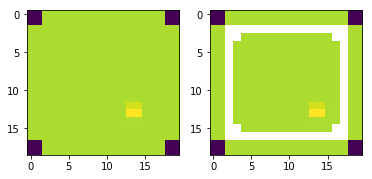

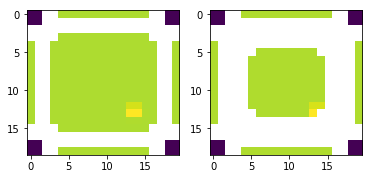

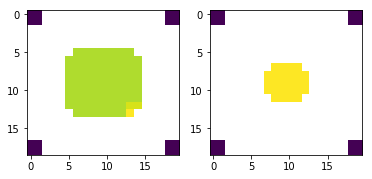

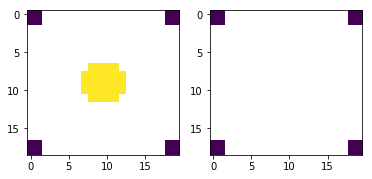

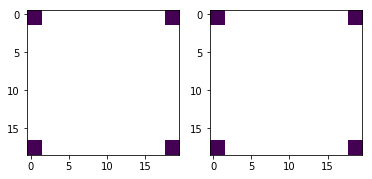

In [19]:
%%px
from GPUSimulators import KP07_dimsplit

sim = KP07_dimsplit.KP07_dimsplit(**arguments)

grid = getFactors(MPI.COMM_WORLD.size, 2)
rank = MPI.COMM_WORLD.rank
    
gc_x = int(sim.u0[0].x_halo)
gc_y = int(sim.u0[0].y_halo)
nx = int(sim.nx)
ny = int(sim.ny)

n_steps = 1
t_end = 5*dt
for i in range(n_steps):
    t_this = t_end/n_steps
    n_steps = int(t_this/dt)
    for j in range(n_steps):
        #Swap east-west boundary
        read_e =  [nx     , gc_y, gc_x, ny]
        write_e = [nx+gc_x, gc_y, gc_x, ny]
        out_e = sim.u0[0].download(sim.stream, async=False, extent=read_e)
        in_e = np.empty((ny, gc_x), dtype=np.float32)
        send_e = MPI.COMM_WORLD.Isend(out_e, dest=getEast(rank, grid), tag=1)
        recv_e = MPI.COMM_WORLD.Irecv(in_e, source=getEast(rank, grid), tag=0)
        #print("Send 1 to ", getEast(rank, grid), " receive 0 from ", getEast(rank, grid))

        read_w =  [gc_x, gc_y, gc_x, ny]
        write_w = [   0, gc_y, gc_x, ny]
        out_w = sim.u0[0].download(sim.stream, async=False, extent=read_w)
        in_w = np.empty((ny, gc_x), dtype=np.float32)
        send_w = MPI.COMM_WORLD.Isend(out_w, dest=getWest(rank, grid), tag=0)
        recv_w = MPI.COMM_WORLD.Irecv(in_w, source=getWest(rank, grid), tag=1)
        #print("Send 0 to ", getWest(rank, grid), " receive 1 from ", getWest(rank, grid))

        #Swap north-south boundary
        read_n =  [gc_x, ny     , nx, gc_y]
        write_n = [gc_x, ny+gc_y, nx, gc_y]
        out_n = sim.u0[0].download(sim.stream, async=False, extent=read_n)
        in_n = np.empty((gc_y, nx), dtype=np.float32)
        send_n = MPI.COMM_WORLD.Isend(out_n, dest=getNorth(rank, grid), tag=3)
        recv_n = MPI.COMM_WORLD.Irecv(in_n, source=getNorth(rank, grid), tag=2)

        read_s =  [gc_x, gc_y, nx, gc_y]
        write_s = [gc_x,    0, nx, gc_y]
        out_s = sim.u0[0].download(sim.stream, async=False, extent=read_s)
        in_s = np.empty((gc_y, nx), dtype=np.float32)
        send_s = MPI.COMM_WORLD.Isend(out_s, dest=getSouth(rank, grid), tag=2)
        recv_s = MPI.COMM_WORLD.Irecv(in_s, source=getSouth(rank, grid), tag=3)

        
        recv_e.wait()
        recv_w.wait()
        recv_n.wait()
        recv_s.wait()
        
        sim.u0[0].upload(in_e, sim.stream, extent=write_e)
        sim.u0[0].upload(in_w, sim.stream, extent=write_w)
        sim.u0[0].upload(in_n, sim.stream, extent=write_n)
        sim.u0[0].upload(in_s, sim.stream, extent=write_s)
        
        send_e.wait()
        send_w.wait()
        send_n.wait()
        send_s.wait()
        
        if (rank == 0):
            h1 = sim.u0[0].download(sim.stream, extent=[0, 0, nx+2*gc_x, ny+2*gc_y])
            plt.figure()
            plt.subplot(1,2,1)
            plt.imshow(h1)
        
        #print(sim.simTime())
        sim.simulate(dt, dt=dt)
        
        if (rank == 0):
            h1 = sim.u0[0].download(sim.stream, extent=[0, 0, nx+2*gc_x, ny+2*gc_y])
            plt.subplot(1,2,2)
            plt.imshow(h1)
    
    
    h1 = sim.u0[0].download(sim.stream)
    #plotSolution(h1, grid)
    